# Baseline TP Parte 1

In [1]:
from common import get_prediction, split_data, get_data

## Cargamos el dataset

In [2]:
data = get_data()
data.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


In [3]:
pred = get_prediction()
pred.head()

0    0
1    0
2    0
3    0
4    1
Name: volveria, dtype: int64

## Dividimos los datos

Separamos los datos al igual que todas las notebooks anteriores para poder comparar correctamente las metricas del baseline

In [4]:
X_train_val, X_val_2, y_train_val, y_val_2 = split_data(data, pred)
X_train_val.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
239,normal,Señor Celestino Miguel,797,mujer,52.0,0,0,39687,3,adelante,fiumark_palermo
281,4d,Señora Reina Benita,141,mujer,NaN,0,2,489:,2,NaN,fiumark_chacarita
504,3d,Señor Emeterio de Jesus,309,hombre,33.0,1,0,"R1RR""55:3",3,NaN,fiumark_chacarita
230,4d,Señor Juan Jorge Alberto,158,hombre,33.0,0,0,"UQVQP1QS""5;42;2",1,NaN,fiumark_palermo
738,4d,Señor Pablo Augusto,495,hombre,24.0,0,0,"C16""675:2",1,NaN,fiumark_palermo


In [5]:
X_train, X_val, y_train, y_val = split_data(X_train_val, y_train_val)
X_train.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
475,4d,Señor Ignacio Nazar,689,hombre,21.0,0,0,572258,1,NaN,fiumark_palermo
247,4d,Señor Abel Omar,644,hombre,NaN,0,0,3823,6,NaN,fiumark_palermo
726,normal,Señor Fausto Rene,468,hombre,59.0,0,0,3359;4,3,NaN,fiumark_palermo
106,3d,Señora Irma Pascualina,707,mujer,48.0,0,0,4457;8,2,NaN,fiumark_palermo
206,4d,Señor Ovidio Valentin,871,hombre,29.0,0,0,56;46:,1,NaN,fiumark_palermo


## Recordamos el Baseline hecho en la parte 1

In [6]:
def baseline(df):
    lista = []
    for c in df.index:
        genero = df.loc[c, 'genero']
        if genero == 'hombre':
            lista.append(0)
        elif genero == 'mujer':
            tipo_sala = df.loc[c, 'tipo_de_sala']
            if tipo_sala == '3d' or tipo_sala == 'normal':
                lista.append(1)
            elif tipo_sala == '4d':
                nombre_sede = df.loc[c, 'nombre_sede']
                if nombre_sede == 'fiumark_quilmes' or nombre_sede == 'fiumark_chacarita':
                    lista.append(1)
                elif nombre_sede == 'fiumark_palermo':
                    lista.append(0)
                
    return lista

Obtenemos las predicciones del val_2

In [7]:
tp1_result = baseline(X_val_2)

In [8]:
tp1_result[0:5]

[0, 0, 0, 1, 0]

## Vemos las métricas

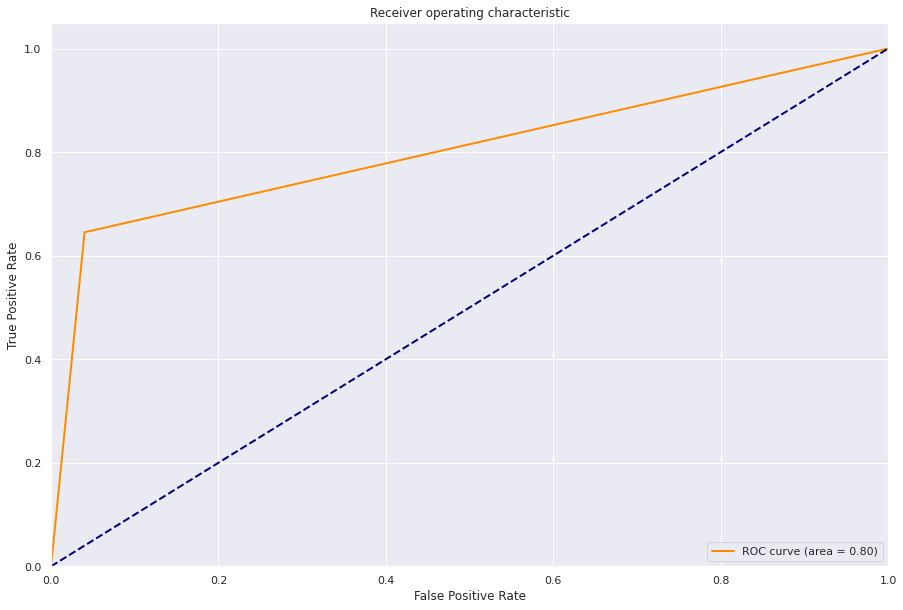

0.8025806451612902

In [9]:
from common import plot_roc
plot_roc(y_val_2, tp1_result)

/home/alexander/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


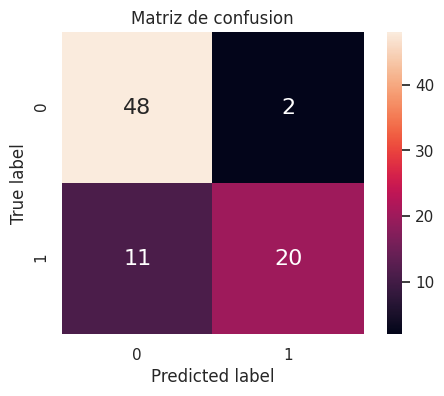

In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_val_2, tp1_result)

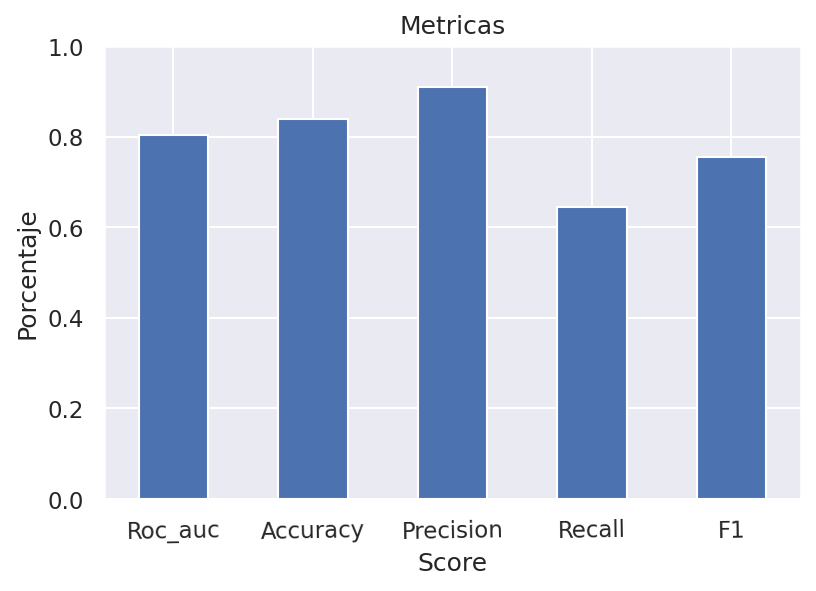

Roc_auc      0.802581
Accuracy     0.839506
Precision    0.909091
Recall       0.645161
F1           0.754717
dtype: float64

In [11]:
from common import plot_metrics
plot_metrics(y_val_2, tp1_result, tp1_result)